# Imports and file loading

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import imageio
from scipy.ndimage.interpolation import rotate
from math import cos, sin
import time
import random
import string
import optical_imaging as oi
import copy
import oi_file
reload(oi)
pi=3.14159

In [21]:
file_directory_mp4='/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/vid/'
file_path_mp4=file_directory_mp4 + 'HCT-116_pr0005_0000.mp4'

file_directory_bvi='/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/'
filepath_bvi=file_directory_bvi + 'section.bvi'

In [3]:
vid = oi_file.open_video_connection(file_path_mp4)

# Define template image and stage

- 'first_cell_imaging':
    - c0: 210, 145
    - c1: 207, 129
    - c2: 298, 125
    - c3: 300, 140
    
- 7-4-2016
    - mix_0001
        - c0: 426, 233
        - c1: 426, 217
        - c2: 517, 217
        - c3: 517, 233
        
- 7-10-2016
    - HCT_0000
        - c0:
        - c1:
        - c2:
        - c3:

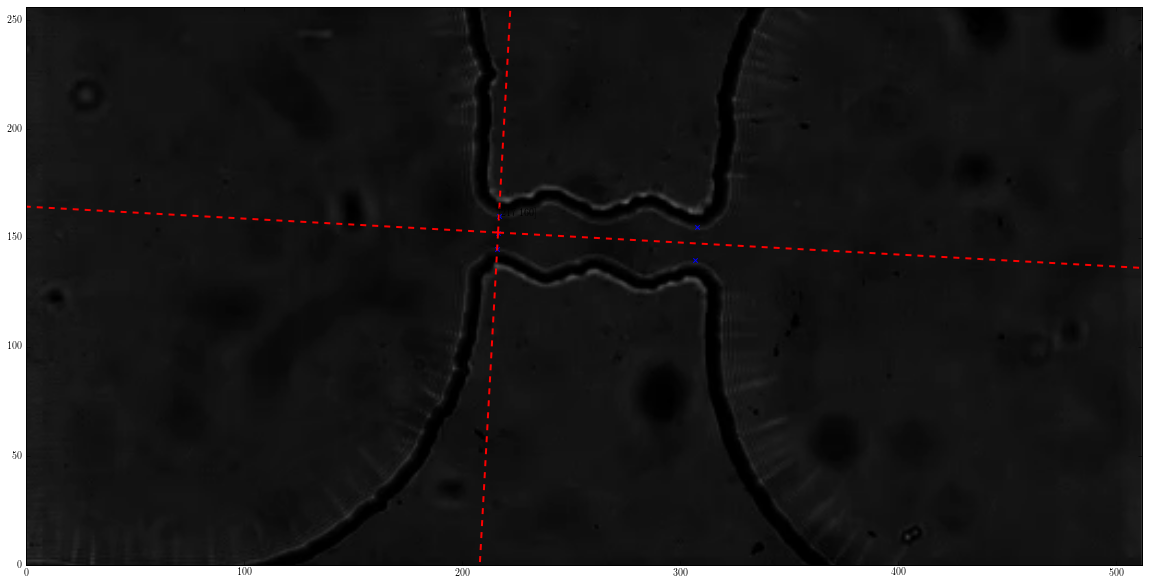

In [13]:
reload(oi)
template_frame = oi.get_frame_vid(vid, 0)
c0 = np.array([217, 160])
c1 = np.array([216, 145])
c2 = np.array([307, 140])
c3 = np.array([308, 155])
stage = oi.Stage(template_frame, c0, c1, c2, c3)
stage.plot_stage()

# Find events

In [22]:
reload(oi)
raw_events=oi.find_events_bvi(filepath_bvi, threshold_difference = .0225, cluster_threshold = 100)

tf:  100 / 1010 	active: 0 	inactive: 0
tf:  200 / 1010 	active: 0 	inactive: 0
tf:  300 / 1010 	active: 1 	inactive: 0
tf:  400 / 1010 	active: 1 	inactive: 0
tf:  500 / 1010 	active: 2 	inactive: 0
tf:  600 / 1010 	active: 2 	inactive: 0
tf:  700 / 1010 	active: 2 	inactive: 0
tf:  800 / 1010 	active: 2 	inactive: 1
tf:  900 / 1010 	active: 2 	inactive: 1
tf:  1000 / 1010 	active: 2 	inactive: 1


In [19]:
oi_file.save_oi_events('/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/events/\
hct-116_pr0005_0000_oi_events_raw',\
                       raw_events)

In [7]:
events = copy.deepcopy(raw_events)

# Create trajectory plot

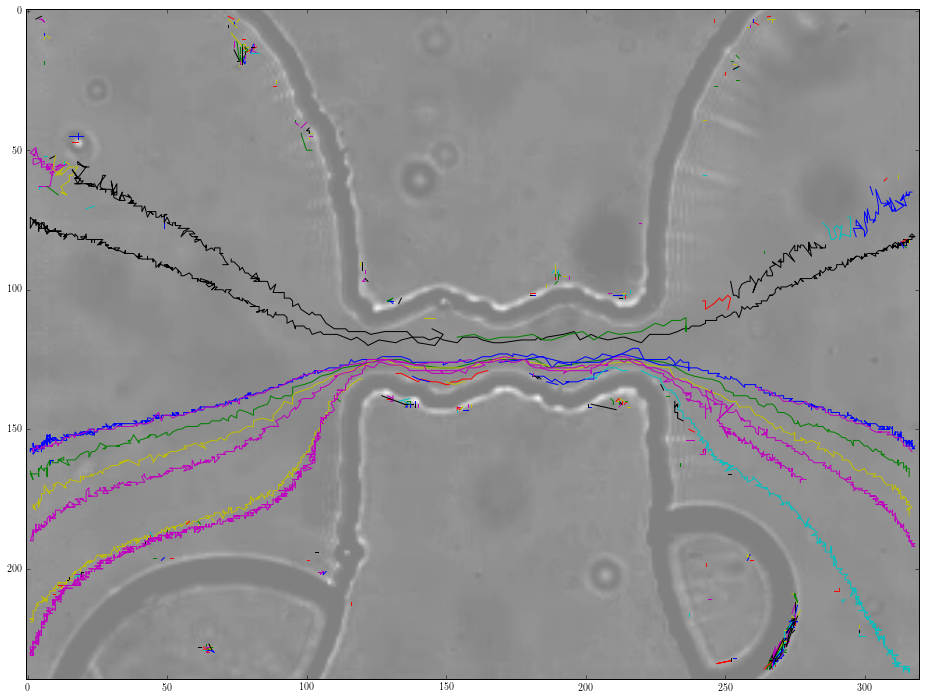

In [8]:
#events = oi.connect_loose_events(events, dist_threshold = 50, tf_sep_threshold = 10)
fig = plt.figure(figsize = (20,12))

for i, event in enumerate(events):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py)

plt.imshow(oi.get_frame(vid,0), alpha=0.5, cmap = 'gray')

plt.show()

In [9]:
reload(oi)
events = oi.connect_loose_events(events, dist_threshold = 20, tf_sep_threshold = 20)

for i, event in enumerate(events):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py)
    #plt.text(10,10, str(i), color = (1.,0,0))

plt.imshow(oi.get_frame(vid,0), alpha=0.5, cmap = 'gray', origin = 'lower')
plt.show()

KeyboardInterrupt: 

# Filter events that don't occur over entire channel

In [34]:
print len(events)
filtered_events = [events[i] for i in range(len(events)) if i not in [7, 9, 18,22]]
print len(filtered_events)

33
29


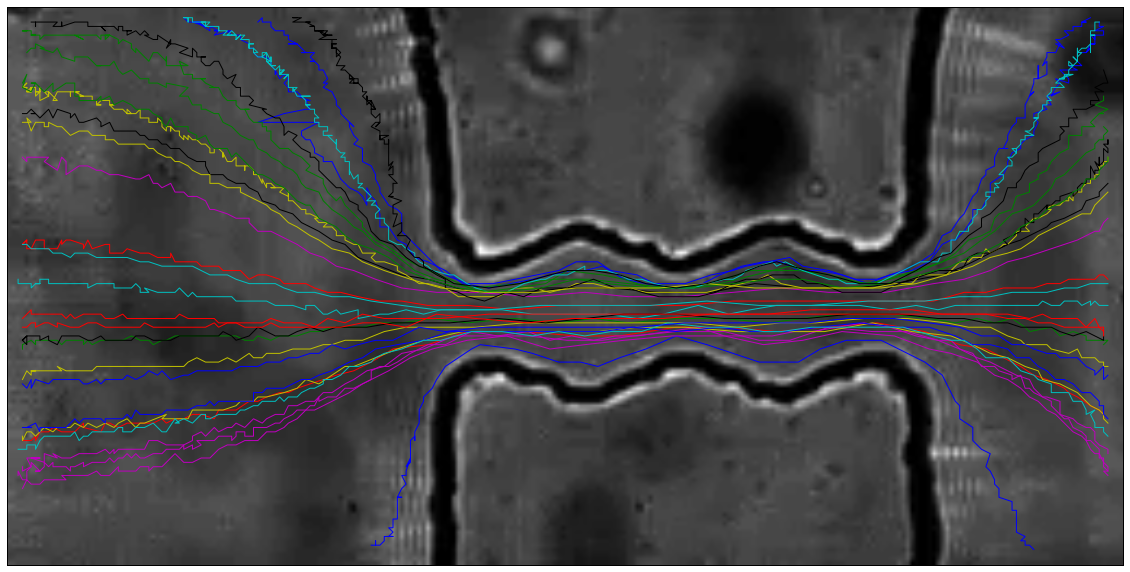

In [36]:
fig = plt.figure(figsize = (20,12))
plt.xticks([])
plt.yticks([])
for event in filtered_events:
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py)

    plt.imshow(oi.get_frame(vid,0), alpha=0.5, cmap = 'gray')

plt.savefig('psmix_trajectories_7-4.png', dpi = 300)
plt.show()